In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 58s 626ms/step - accuracy: 0.5763 - loss: 0.8423 - val_accuracy: 0.7659 - val_loss: 0.5695
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 470ms/step - accuracy: 0.7703 - loss: 0.5325 - val_accuracy: 0.7724 - val_loss: 0.5206
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 400ms/step - accuracy: 0.8283 - loss: 0.4316 - val_accuracy: 0.8423 - val_loss: 0.3982
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 407ms/step - accuracy: 0.8575 - loss: 0.3431 - val_accuracy: 0.8520 - val_loss: 0.3637
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 421ms/step - accuracy: 0.8713 - loss: 0.3332 - val_accuracy: 0.8894 - val_loss: 0.2753
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.8922 - loss: 0.2949 - val_accuracy: 0.8959 - val_loss: 0.2968
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.8938 - loss: 0.2734 - val_accuracy: 0.9106 - val_loss: 0.2373
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.8936 - loss: 0.2763 - val_accuracy: 0.884

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9422 - loss: 0.1633
Test Loss: 0.17998966574668884
Test Accuracy: 0.9388816356658936
{'accuracy': [0.669650137424469, 0.7774613499641418, 0.8315703868865967, 0.8498779535293579, 0.8779495358467102, 0.8751016855239868, 0.8946297764778137, 0.8962571024894714, 0.9092758297920227, 0.9288039207458496, 0.9267697334289551, 0.9218876957893372, 0.9218876957893372, 0.9422294497489929, 0.9511798024177551, 0.9491456747055054], 'loss': [0.708477795124054, 0.5208810567855835, 0.4115194082260132, 0.3678755760192871, 0.3164082467556, 0.34563910961151123, 0.27625352144241333, 0.27983906865119934, 0.23322650790214539, 0.19173967838287354, 0.2186708152294159, 0.21949215233325958, 0.2044263482093811, 0.1627833992242813, 0.1433396339416504, 0.14822782576084137], 'val_accuracy': [0.7658536434173584, 0.772357702255249, 0.842276394367218, 0.8520325422286987, 0.8894308805465698, 0.8959349393844604, 0.9105691313743591, 0.8845528364181519, 0.9170731902122498,

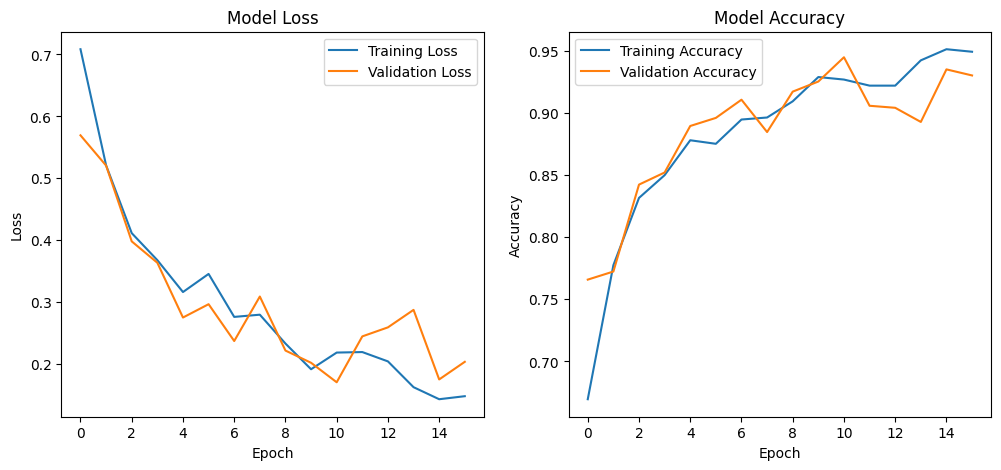

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


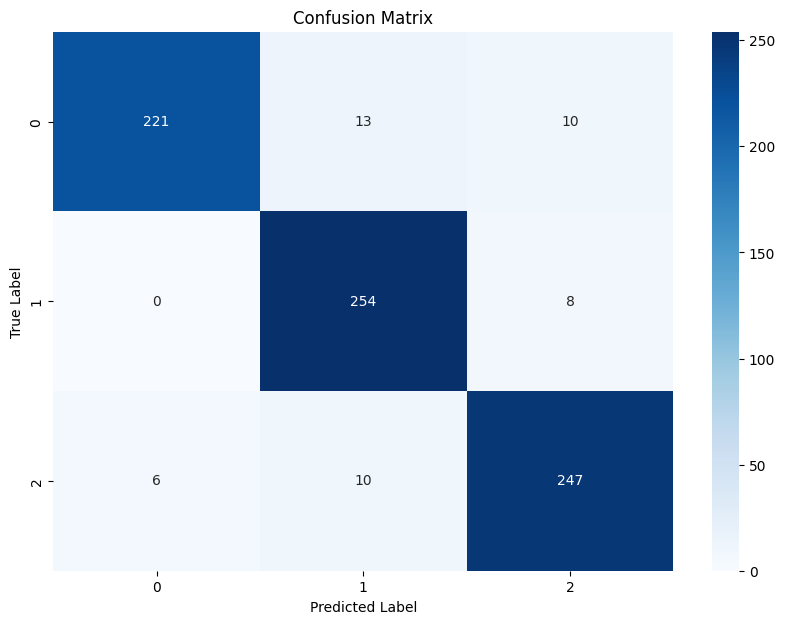

*********REPORT FOR  ALEXNET  MODEL********* /n
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

       eagle       0.97      0.91      0.94       244
       panda       0.92      0.97      0.94       262
  polar-bear       0.93      0.94      0.94       263

    accuracy                           0.94       769
   macro avg       0.94      0.94      0.94       769
weighted avg       0.94      0.94      0.94       769

****************************************


In [ ]:
import argparse
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import layers, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import load_model, Model
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def report_model(md, model_name, images, labels, classes):
    print("*********REPORT FOR ", model_name.upper(), " MODEL********* /n")
    predictions = md.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    report = classification_report(labels, predicted_labels, target_names=list(classes.keys()),
                                   labels=list(classes.values()))
    print(report)
    print("****************************************")

train_imgs = np.load('drive/MyDrive/cropped/train_imgs.npy')
train_labels = np.load('drive/MyDrive/cropped/train_labels.npy')
test_imgs = np.load('drive/MyDrive/cropped/test_imgs.npy')
test_labels = np.load('drive/MyDrive/cropped/test_labels.npy')
val_imgs = np.load('drive/MyDrive/cropped/val_imgs.npy')
val_labels = np.load('drive/MyDrive/cropped/val_labels.npy')

class_map = {'eagle': 0, 'panda': 1, 'polar-bear': 2}

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                   rotation_range=20)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
val_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                   rotation_range=20)

train_set = train_datagen.flow(train_imgs,
                                     train_labels,
                                     batch_size=32,
                                     shuffle=True)
test_set = test_datagen.flow(test_imgs,
                                   test_labels,
                                   batch_size=32,
                                   shuffle=False)
val_set = val_datagen.flow(val_imgs,
                                 val_labels,
                                 batch_size=32,
                                 shuffle=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


alexnet_model = Sequential()

alexnet_model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu', input_shape=(224,224,3)))

alexnet_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

alexnet_model.add(Conv2D(filters=192, kernel_size=(5,5), padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
alexnet_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dense(3, activation='softmax'))

alexnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history = alexnet_model.fit(train_set, epochs=50, validation_data=val_set, callbacks=[stop_early])
alexnet_model.save('alexnet_model.h5')


test_loss, test_accuracy = alexnet_model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

print(history.history)

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Confusion matrix
test_predictions = alexnet_model.predict(test_imgs)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels

conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report_model(alexnet_model, "AlexNet", test_imgs, test_labels, class_map)